### Stock Market Prediction And Forecasting Using Stacked LSTM

In [3]:
### Data Collection
import pandas_datareader as pdr
key=""

In [9]:
df = pdr.get_data_tiingo('AAPL', api_key= 'b6ce6fd717abe446fe37737e6cc95f13dd7d7228')

C:\Users\admin\AppData\Local\Temp\ipykernel_1376\2507373187.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key= 'b6ce6fd717abe446fe37737e6cc95f13dd7d7228')


In [10]:
df.to_csv('AAPL.csv')# apple company

In [11]:
import pandas as pd

In [12]:
df=pd.read_csv('AAPL.csv')

In [13]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-06-11 00:00:00+00:00,191.23,191.97,190.21,191.35,18308460,45.684597,45.861382,45.440920,45.713265,73233840,0.0,1.0
1,AAPL,2018-06-12 00:00:00+00:00,192.28,192.61,191.15,191.39,16911141,45.935441,46.014277,45.665485,45.722821,67644564,0.0,1.0
2,AAPL,2018-06-13 00:00:00+00:00,190.70,192.88,190.44,192.42,21638393,45.557981,46.078780,45.495867,45.968886,86553572,0.0,1.0
3,AAPL,2018-06-14 00:00:00+00:00,190.80,191.57,190.22,191.55,21610074,45.581871,45.765823,45.443309,45.761045,86440296,0.0,1.0
4,AAPL,2018-06-15 00:00:00+00:00,188.84,190.16,188.26,190.03,61719160,45.113629,45.428975,44.975068,45.397919,246876640,0.0,1.0


In [15]:
df1=df.reset_index()['close']

In [16]:
df1

0       191.23
1       192.28
2       190.70
3       190.80
4       188.84
         ...  
1254    179.58
1255    179.21
1256    177.82
1257    180.57
1258    180.96
Name: close, Length: 1259, dtype: float64

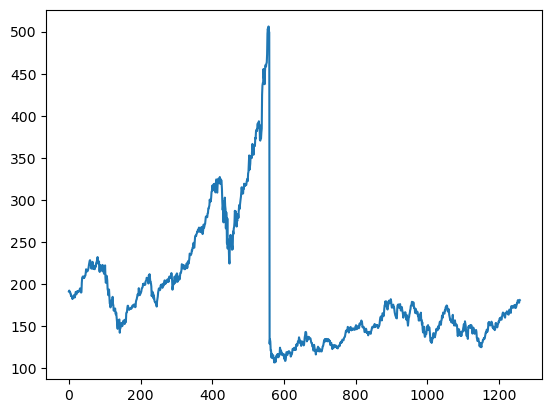

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [18]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [19]:
import numpy as np

In [20]:
df1

0       191.23
1       192.28
2       190.70
3       190.80
4       188.84
         ...  
1254    179.58
1255    179.21
1256    177.82
1257    180.57
1258    180.96
Name: close, Length: 1259, dtype: float64

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
print(df1)

[[0.21137132]
 [0.21400125]
 [0.21004383]
 ...
 [0.17778334]
 [0.18467126]
 [0.18564809]]


In [ ]:
#splitting dataset into train and test split

In [23]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
training_size,test_size

(818, 441)

In [55]:
train_data

array([[2.11371321e-01],
       [2.14001252e-01],
       [2.10043832e-01],
       [2.10294302e-01],
       [2.05385097e-01],
       [2.05134627e-01],
       [1.97495304e-01],
       [1.99524108e-01],
       [1.96919224e-01],
       [1.95566688e-01],
       [1.88678773e-01],
       [1.94339386e-01],
       [1.93663118e-01],
       [1.97019411e-01],
       [1.96042580e-01],
       [2.01227301e-01],
       [1.93061991e-01],
       [1.96768942e-01],
       [2.03206011e-01],
       [2.09743269e-01],
       [2.09167188e-01],
       [2.02980589e-01],
       [2.10870382e-01],
       [2.11621791e-01],
       [2.10569818e-01],
       [2.11922354e-01],
       [2.09292423e-01],
       [2.12999374e-01],
       [2.11897307e-01],
       [2.12323106e-01],
       [2.15804634e-01],
       [2.20363181e-01],
       [2.18835316e-01],
       [2.10745147e-01],
       [2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],


In [56]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        return numpy.array(dataX), numpy.array(dataY)

In [58]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [59]:
print(X_train.shape), print(y_train.shape)

(1, 100)
(1,)


(None, None)

In [60]:
print(X_test.shape), print(ytest.shape)

(1, 100)
(1,)


(None, None)

In [61]:
# reshape input for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [62]:
# Creating the model Stacked LSTM 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [63]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [431]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 487ms/step - loss: 0.0206 - val_loss: 0.0505
Epoch 2/100
12/12 [==============================] - 4s 309ms/step - loss: 0.0035 - val_loss: 0.0046
Epoch 3/100
12/12 [==============================] - 4s 300ms/step - loss: 0.0014 - val_loss: 0.0040
Epoch 4/100
12/12 [==============================] - 3s 287ms/step - loss: 8.1361e-04 - val_loss: 0.0073
Epoch 5/100
12/12 [==============================] - 3s 290ms/step - loss: 6.6860e-04 - val_loss: 0.0062
Epoch 6/100
12/12 [==============================] - 3s 255ms/step - loss: 6.4653e-04 - val_loss: 0.0062
Epoch 7/100
12/12 [==============================] - 3s 291ms/step - loss: 6.6186e-04 - val_loss: 0.0062
Epoch 8/100
12/12 [==============================] - 4s 300ms/step - loss: 6.2498e-04 - val_loss: 0.0049
Epoch 9/100
12/12 [==============================] - 4s 297ms/step - loss: 6.2745e-04 - val_loss: 0.0042
Epoch 10/100
12/12 [==============================] - 4s 303ms/step

In [35]:
import tensorflow as tf

In [65]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 88ms/step


In [66]:
#Transforming to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [67]:
# Calculating RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

110.34563699358019

In [68]:
math.sqrt(mean_squared_error(ytest,test_predict))

108.93575599894945

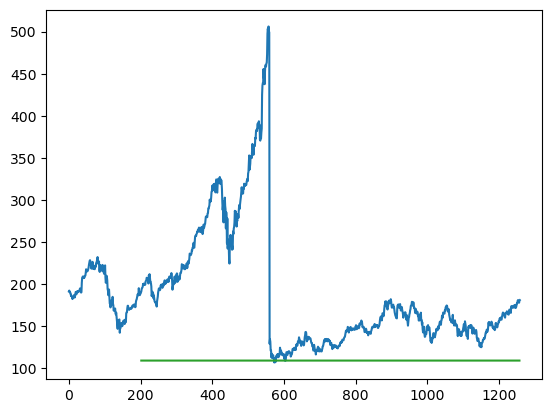

In [69]:
# shift train predictions
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [70]:
len(test_data)

441

In [71]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [72]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.07105823418910456,
 0.07120851596743893,
 0.07772072636192856,
 0.08583594239198494,
 0.08939261114589853,
 0.08771446462116467,
 0.09297432686286783,
 0.09790857858484658,
 0.09056981840951783,
 0.0938008766437069,
 0.09665623043206006,
 0.11015654351909826,
 0.11937382592360674,
 0.1124358171571696,
 0.11974953036944269,
 0.11291170945522849,
 0.11028177833437691,
 0.1106324358171571,
 0.11774577332498432,
 0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.130469630557

In [73]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.00499585]
101
1 day input [0.07120852 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433
 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383
 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577
 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257
 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848
 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565
 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534
 0.17112085 0.16871634 0.16210394

8 day output [[0.00723825]]
9 day input [0.09380088 0.09665623 0.11015654 0.11937383 0.11243582 0.11974953
 0.11291171 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272
 0.11739512 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224
 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568
 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986
 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446
 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074
 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419
 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504
 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731
 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185
 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369
 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634
 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567
 0.183469   0.18562304

16 day output [[0.00407722]]
17 day input [0.11063244 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967
 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553
 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117
 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517
 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583
 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363
 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341 0.13340013
 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589
 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512
 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134
 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526
 0.16568566 0.17179712 0.1764809  0.17635567 0.183469   0.18562304
 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809 0.00499585
 0.005215   0.005605

24 day output [[0.00155249]]
25 day input [0.10659987 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848
 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565
 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534
 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712
 0.1764809  0.17635567 0.183469   0.18562304 0.18219161 0.18126487
 0.17778334 0.18467126 0.18564809 0.00499585 0.005215   0.00560542
 0.0060813  0.00654841 0.0069318  0.00718452 0.00728636 0.00723825
 0.00705564 0.006762

In [74]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [75]:
import matplotlib.pyplot as plt

In [76]:
len(df1)

1259

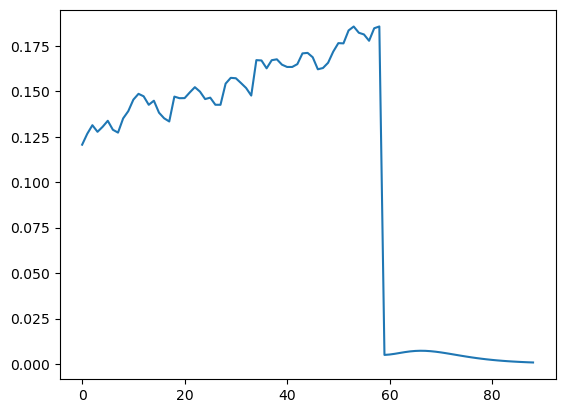

In [77]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [53]:
df3=scaler.inverse_transform(df3).tolist()

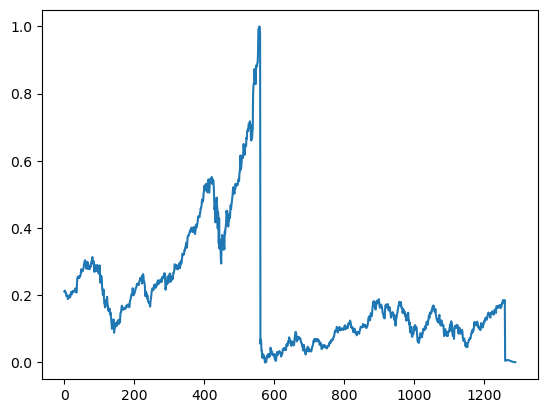

In [78]:
plt.plot(df3)

In [ ]:
thank you